In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [3]:
# Load merged dataset
df = pd.read_csv("/content/merged_trader_sentiment_data.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Show first few rows
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed,80.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed,80.0


In [4]:
# Overview
print("Shape:", df.shape)
df.info()

Shape: (211224, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  floa

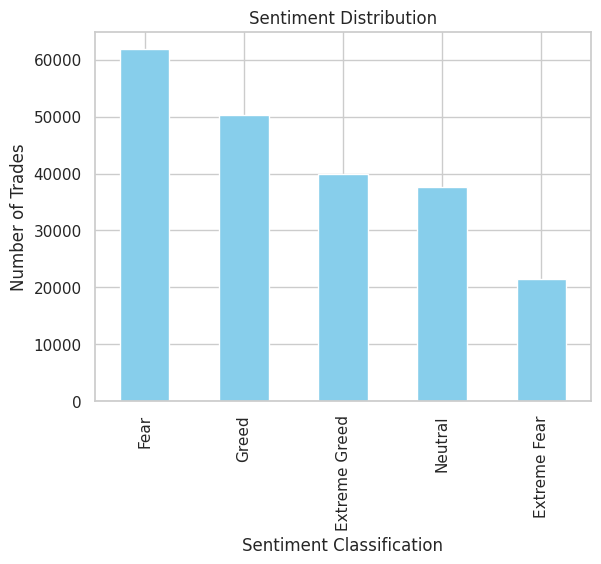

In [5]:
# Count of Sentiment Categories
df['classification'].value_counts().plot(kind='bar', color='skyblue', title='Sentiment Distribution')
plt.xlabel('Sentiment Classification')
plt.ylabel('Number of Trades')
plt.show()

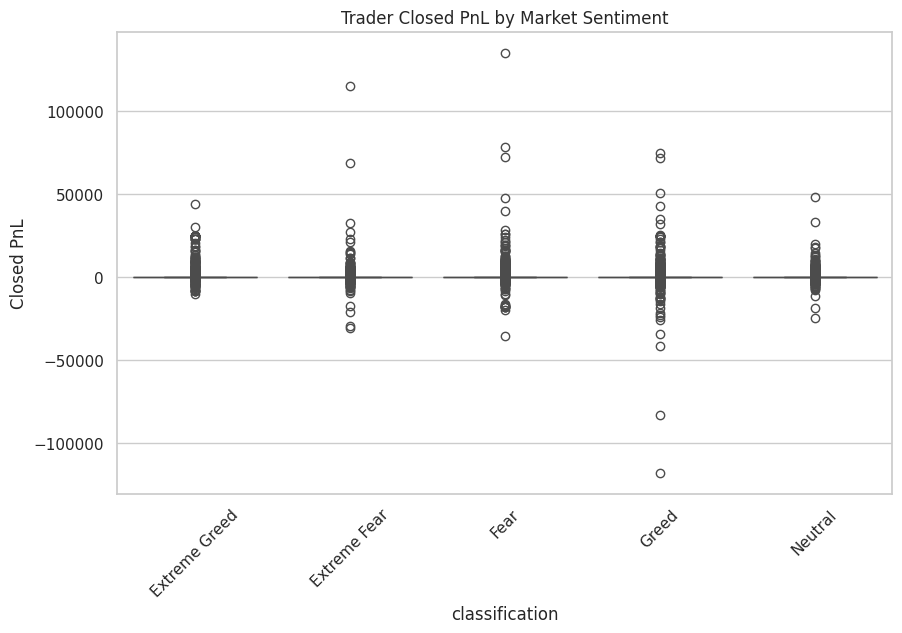

In [6]:
# Boxplot: Closed PnL by Sentiment Classification
plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Closed PnL', data=df)
plt.title('Trader Closed PnL by Market Sentiment')
plt.xticks(rotation=45)
plt.show()

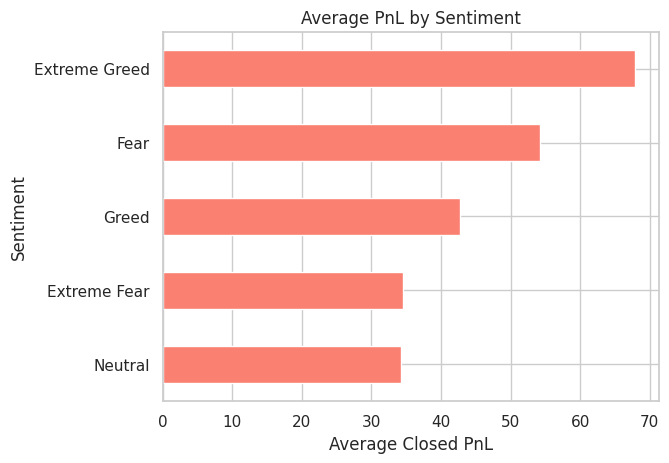

In [7]:
# Group by sentiment and calculate average PnL
avg_pnl_by_sentiment = df.groupby('classification')['Closed PnL'].mean().sort_values()
avg_pnl_by_sentiment.plot(kind='barh', color='salmon', title='Average PnL by Sentiment')
plt.xlabel('Average Closed PnL')
plt.ylabel('Sentiment')
plt.show()

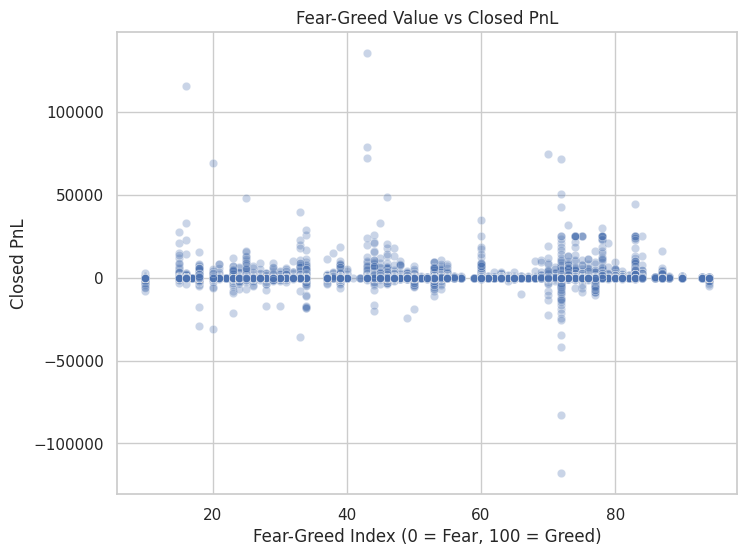

Correlation between Fear-Greed Value and Closed PnL: 0.0081


In [9]:
# Scatter plot to see any linear relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='value', y='Closed PnL', data=df, alpha=0.3)
plt.title('Fear-Greed Value vs Closed PnL')
plt.xlabel('Fear-Greed Index (0 = Fear, 100 = Greed)')
plt.ylabel('Closed PnL')
plt.show()
# Correlation coefficient
correlation = df['value'].corr(df['Closed PnL'])
print(f"Correlation between Fear-Greed Value and Closed PnL: {correlation:.4f}")

## 📌 Conclusion

- Traders tend to perform differently based on market sentiment.
- Boxplots and mean PnL show how risk appetite shifts with sentiment (e.g., higher losses/gains during 'Greed').
- Weak or no linear correlation found between the numeric value of the index and PnL.
- Further analysis could include segmentation by leverage, time of day, or account performance over time.